In [8]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_iris

In [9]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
X = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

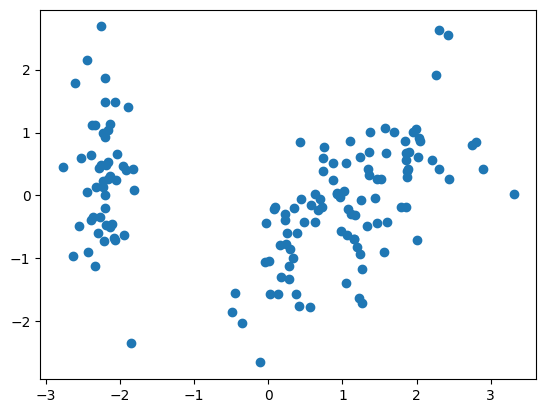

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1])

Text(0, 0.5, 'Euclidean distances')

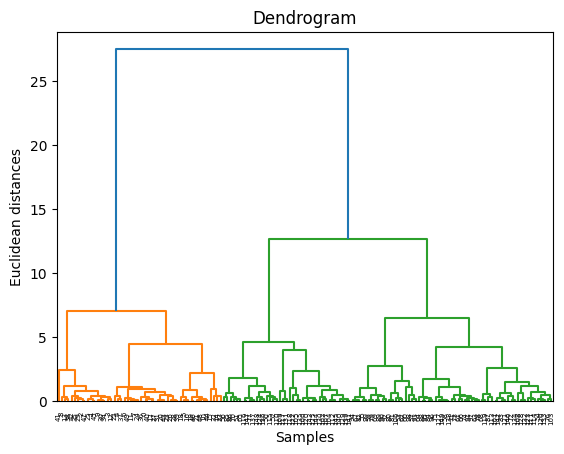

In [14]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')


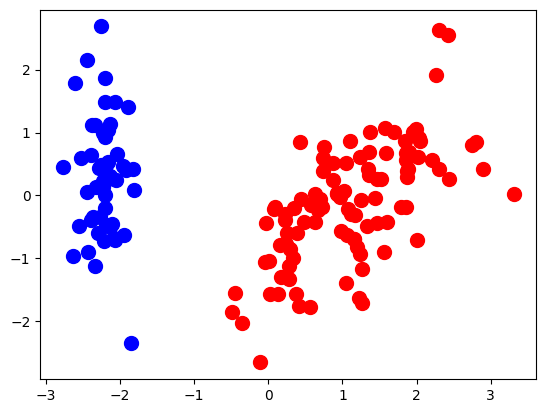

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_pca)
plt.scatter(X_pca[y_hc==0,0], X_pca[y_hc==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_hc==1,0], X_pca[y_hc==1,1], s=100, c='blue', label='Cluster 2')

In [21]:
from sklearn.metrics import silhouette_score
Silhouette_values =[]
for n_cluster in range(2,11):
    hc = AgglomerativeClustering(n_clusters=n_cluster, metric='euclidean', linkage='ward')
    cluster_labels = hc.fit_predict(X_pca)
    silhouette_value = silhouette_score(X_pca,cluster_labels)
    Silhouette_values.append(silhouette_value)
print(Silhouette_values)

[0.6145202036230452, 0.511059598876619, 0.4487350420958893, 0.4041689631006267, 0.3672112889583074, 0.3706820678912666, 0.3930552606912111, 0.4183694466469872, 0.405420562888949]
